In [33]:
import torch
import torch.nn.init
import torchvision
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=10)

testset  = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=10)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


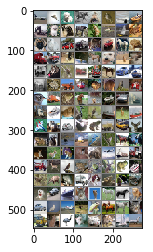

planeplane  doghorse


In [34]:
import matplotlib.pylab as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' % classes[labels[j]] for j in range(4)))

## Define Couvolution Neural Network

In [35]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.b1 = nn.BatchNorm2d(24)
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.b2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.b1((self.conv1(x)))))
        x = self.pool(F.relu(self.b2(self.conv2(x))))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net

Net (
  (conv1): Conv2d(3, 24, kernel_size=(5, 5), stride=(1, 1))
  (b1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True)
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (fc1): Linear (1600 -> 240)
  (fc2): Linear (240 -> 84)
  (fc3): Linear (84 -> 10)
)

In [36]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [38]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 128 == 127:   # print every 2000 mini-batches
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i+ 1, running_loss / 128))
            running_loss = 0.0
    
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        
    print('Accuracy 1000 test images : %d %%'% (100 * correct/total))
    
print('Finished Training')

torch.save(net.state_dict(), 'CNN.pkl')

[1,   128] loss : 1.062
[1,   256] loss : 0.997
[1,   384] loss : 0.949
Accuracy 1000 test images : 58 %
[2,   128] loss : 0.874
[2,   256] loss : 0.860
[2,   384] loss : 0.851
Accuracy 1000 test images : 62 %
[3,   128] loss : 0.746
[3,   256] loss : 0.764
[3,   384] loss : 0.757
Accuracy 1000 test images : 64 %
[4,   128] loss : 0.668
[4,   256] loss : 0.671
[4,   384] loss : 0.668
Accuracy 1000 test images : 63 %
[5,   128] loss : 0.608
[5,   256] loss : 0.602
[5,   384] loss : 0.605
Accuracy 1000 test images : 66 %
[6,   128] loss : 0.534
[6,   256] loss : 0.538
[6,   384] loss : 0.558
Accuracy 1000 test images : 66 %
[7,   128] loss : 0.452
[7,   256] loss : 0.471
[7,   384] loss : 0.492
Accuracy 1000 test images : 67 %
[8,   128] loss : 0.399
[8,   256] loss : 0.415
[8,   384] loss : 0.437
Accuracy 1000 test images : 66 %
[9,   128] loss : 0.354
[9,   256] loss : 0.364
[9,   384] loss : 0.369
Accuracy 1000 test images : 67 %
[10,   128] loss : 0.280
[10,   256] loss : 0.327
[10, 

In [39]:
for data in testloader:
    images, labels = data
    print(labels.size())
    print(labels)
    print(labels.size(0))

torch.Size([4])

 3
 8
 8
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 1
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 0
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 7
 9
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 7
 8
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 4
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 2
 4
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 6
 6
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 5
 9
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 1
 9
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 5
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 9
 3
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 6
 9
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 3
 8
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 7
 4
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 3
 6
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 2
 

torch.Size([4])

 8
 9
 6
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 6
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 3
 5
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 5
 0
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 6
 4
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 9
 6
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 8
 5
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 2
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 7
 1
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 9
 9
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 1
 2
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 8
 7
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 3
 0
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 3
 0
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 1
 3
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 5
 3
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 6
 

torch.Size([4])

 9
 9
 9
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 6
 6
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 1
 5
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 4
 1
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 1
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 0
 8
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 6
 7
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 4
 7
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 8
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 2
 1
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 9
 8
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 9
 0
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 1
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 3
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 2
 2
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 8
 9
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 9
 

4
torch.Size([4])

 5
 6
 8
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 3
 7
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 9
 1
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 5
 8
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 9
 6
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 3
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 8
 0
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 5
 0
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 3
 9
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 3
 4
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 9
 9
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 8
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 2
 5
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 1
 0
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 2
 1
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 3
 7
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1

torch.Size([4])

 0
 8
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 1
 5
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 1
 2
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 4
 8
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 6
 4
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 8
 4
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 2
 4
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 6
 4
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 3
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 0
 0
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 5
 8
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 4
 8
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 4
 5
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 3
 7
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 0
 5
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 8
 0
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 2
 

torch.Size([4])

 7
 6
 6
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 6
 5
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 8
 8
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 7
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 6
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 5
 4
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 8
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 9
 3
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 8
 3
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 9
 6
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 4
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 7
 1
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 3
 2
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 9
 3
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 0
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 

torch.Size([4])

 3
 6
 8
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 9
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 1
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 2
 3
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 5
 4
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 7
 4
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 7
 6
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 1
 2
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 1
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 1
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 8
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 1
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 5
 8
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 5
 

torch.Size([4])

 0
 1
 9
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 3
 4
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 0
 0
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 3
 4
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 2
 8
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 9
 9
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 4
 3
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 4
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 3
 8
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 8
 0
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 3
 9
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 5
 1
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 9
 1
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 2
 1
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 3
 0
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 8
 6
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 1
 


4
torch.Size([4])

 9
 1
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 3
 5
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 0
 0
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 4
 7
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 8
 3
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 9
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 8
 3
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 5
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 3
 1
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 1
 3
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 7
 5
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 0
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 5
 8
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 4
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 4
 0
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 

torch.Size([4])

 7
 4
 3
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 4
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 3
 1
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 4
 2
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 3
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 9
 7
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 4
 8
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 5
 9
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 1
 4
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 2
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 1
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 3
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 7
 7
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 3
 4
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 7
 5
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 4
 3
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 1
 

torch.Size([4])

 0
 9
 2
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 0
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 3
 5
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 9
 6
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 5
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 9
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 8
 9
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 7
 0
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 1
 6
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 1
 4
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 1
 6
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 2
 5
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 2
 8
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 6
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 6
 4
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 5
 

4
torch.Size([4])

 3
 2
 2
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 5
 9
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 7
 4
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 5
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 4
 0
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 9
 8
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 4
 2
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 0
 5
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 8
 2
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 5
 2
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 7
 9
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 4
 1
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 4
 5
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 7
 1
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 1
 2
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 0
 6
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 7

torch.Size([4])

 0
 8
 7
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 4
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 4
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 0
 5
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 0
 2
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 3
 8
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 1
 2
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 5
 9
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 6
 1
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 8
 9
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 9
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 4
 5
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 3
 3
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 7
 7
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 6
 3
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 1
 6
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 8
 


4
torch.Size([4])

 1
 5
 3
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 8
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 6
 1
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 6
 2
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 6
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 5
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 4
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 5
 1
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 7
 5
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 3
 6
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 4
 0
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 7
 3
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 1
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 2
 2
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 8
 2
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 6
 3
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 

torch.Size([4])

 2
 0
 6
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 1
 3
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 3
 7
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 4
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 9
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 2
 9
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 9
 3
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 7
 7
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 6
 5
 3
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 1
 2
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 8
 2
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 7
 9
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 6
 7
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 1
 3
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 9
 3
 6
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 2
 7
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 5
 

torch.Size([4])

 8
 5
 6
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 5
 9
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 3
 2
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 3
 0
 2
 0
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 3
 9
 3
[torch.LongTensor of size 4]

4
torch.Size([4])

 5
 7
 6
 5
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 5
 6
 1
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 4
 0
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 7
 8
 4
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 0
 9
 5
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 2
 9
 3
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 4
 3
 2
 2
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 8
 6
 8
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 6
 8
 9
[torch.LongTensor of size 4]

4
torch.Size([4])

 8
 2
 1
 4
[torch.LongTensor of size 4]

4
torch.Size([4])

 9
 1
 5
 7
[torch.LongTensor of size 4]

4
torch.Size([4])

 1
 6
 

## Test test data

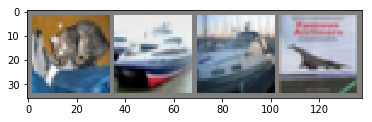

GroundTruth :    cat ship shipplane


In [40]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ',''.join('%5s' % classes[labels[j]] for j in range(4)))

In [41]:
outputsts = neVariableiable(images))

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   dog plane horse


In [42]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variableable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accurcay to 10000 test images : %d %%' %(100* correct / total))

Accurcay to 10000 test images : 66 %


In [45]:
class_correct = [0. for i in range(10)]
class_total = [0. for i in range(10)]
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuray of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuray of plane : 62 %
Accuray of   car : 76 %
Accuray of  bird : 61 %
Accuray of   cat : 43 %
Accuray of  deer : 61 %
Accuray of   dog : 57 %
Accuray of  frog : 68 %
Accuray of horse : 71 %
Accuray of  ship : 79 %
Accuray of truck : 79 %
